# 기본 설정

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS as stopwords
from PIL import Image, ImageFilter
from wordcloud import ImageColorGenerator
from matplotlib import font_manager, rc
from collections import Counter
import konlpy
from konlpy.tag import Mecab
import time
import seaborn as sns
import matplotlib.pyplot as plt
from random import shuffle
import json
from tqdm.notebook import tqdm
tqdm.pandas()
import gensim 
from gensim.models import Word2Vec, FastText, Doc2Vec
import fasttext
from bokeh.plotting import figure, output_file, save
from bokeh.io import curdoc, show
from bokeh.transform import factor_cmap, factor_mark
from bokeh.models import ColumnDataSource, Grid, LinearAxis, Plot, Text
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value
from sklearn.feature_extraction.text import TfidfVectorizer
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value
output_notebook()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


Loading BokehJS ...

In [2]:
# pandas profiling 쓰는 법
import tqdm
import pandas as pd
import pandas_profiling
############ 한글 폰트 지정하는 부분 #################
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    font_name = font_manager.FontProperties(fname="/Library/Fonts/NanumBarunGothic.ttf").get_name()
    rc('font', family='AppleGothic')

In [3]:
bills = pd.read_csv('/Users/junghyunwoo/혀누에-의한-혀누를-위한-혀누의/공부공부공부공부/대학 이후/코딩 관련/개인프로젝트_국회의원 추천 (20대)/1차 데이터 및 jupyter/bills_24839_all_cleansed.csv')
senators = pd.read_csv('/Users/junghyunwoo/혀누에-의한-혀누를-위한-혀누의/공부공부공부공부/대학 이후/코딩 관련/개인프로젝트_국회의원 추천 (20대)/1차 데이터 및 jupyter/(원본) assembly_memebers_295.csv')

In [4]:
senators['한글이름'] = senators['이름'].str.split(' ').str[0]
senators['한자이름'] = senators['이름'].str.split(' ').str[1]

In [5]:
bills = bills[bills['발의자'] != '위원장']
bills = bills[bills['발의자'] != '정부'] 
bills = bills.dropna()

# 유저 인풋 만들기

In [6]:
embedding_model = Word2Vec.load('../models/word2vec ver21.0.model')

In [7]:
with open('/Users/junghyunwoo/혀누에-의한-혀누를-위한-혀누의/공부공부공부공부/대학 이후/코딩 관련/개인프로젝트_국회의원 추천 (20대)/1차 데이터 및 jupyter/senators ver21.0.json', 'r') as f:
    senators_json = json.load(f)

In [8]:
word_dict = {}
for vocab, vector in zip(embedding_model.wv.index2word, embedding_model.wv.vectors):
    word_dict[vocab] = vector

### 함수 모음

In [9]:
senators

,이름,정당,선거구,당선횟수,소속위원회,학력,주요경력,연락처,이메일,대표발의법안수,위원회 출석률,본회의 출석률,재산,한글이름,한자이름
0,강길부 姜吉夫,무소속,울산 울주군,"4선 [ 17대, 18대, 19대, 20대 ]",산업통상자원중소벤처기업위원회,언양농업고등학교/성균관대학교 행정학과/서울대학교환경대학원 도시계획학 석사,6대 건설교통부 차관/한국감정원 원장,의원회관 606호 | 전화 02-784-5073 | 팩스 02-788-0103,shinmut@assembly.go.kr,2,93.65 %,82.88 %,"총계 3,386,959 3,436,703 3,394,464 3,762,663",강길부,姜吉夫
1,강병원 姜炳遠,더불어민주당,서울 은평구을,1선,기획재정위원회,서울대학교 농업생명과학대학 농경제학과,서울대학교 총학생회장/노무현대통령 청와대 행정관,의원회관 610호 | 전화 02-784-1422 | 팩스 02-788-0118,kangbw89@gmail.com,14,98.15 %,98.63 %,"총계 662,157 754,761 888,275 989,750",강병원,姜炳遠
2,강석진 姜錫振,미래통합당,경남 산청군함양군거창군합천군,1선,농림축산식품해양수산위원회,연세대학교 행정대학원,새누리당 최경환 원내대표 비서실장/경남 거창군수,의원회관 542호 | 전화 02-784-1460 | 팩스 02-788-0119,ksjv7900@naver.com,19,98.36 %,93.84 %,"총계 365,671 472,584 532,440 724,182",강석진,姜錫振
3,강석호 姜碩鎬,미래통합당,경북 영양군영덕군봉화군울진군,"3선 [ 18대, 19대, 20대 ]",농림축산식품해양수산위원회,한국외국어대학교 서양어대학 스페인어과,새누리당 제1사무부총장/경상북도의회 의원/스텔베르그&삼일 대표이사,의원회관 707호 | 전화 02-784-2374 | 팩스 02-788-0105,kangsh@na.go.kr,8,88.46 %,86.99 %,"총계 15,371,209 13,904,477 16,757,244 16,732,344",강석호,姜碩鎬
4,강창일 姜昌一,더불어민주당,제주 제주시갑,"4선 [ 17대, 18대, 19대, 20대 ]",행정안전위원회,서울대학교 국사학과/도쿄대학교대학원 문학 박사,5.18기념재단 이사/배재대학교 교무처장,의원회관 806호 | 전화 02-784-6084 | 팩스 02-788-0108,kangci@assembly.go.kr,10,83.33 %,90.41 %,"총계 1,618,382 2,111,355 2,257,761 1,866,353",강창일,姜昌一
5,강효상 姜孝祥,미래통합당,비례대표,1선,공공부문 채용비리 의혹과 관련된 국정조사특별위원회,서울대학교 법과대학 사법학과 졸업,TV조선 보도본부장/조선일보 편집국장,의원회관 418호 | 전화 02-784-6195 | 팩스 02-788-0400,hyoshang@gmail.com,12,88.89 %,83.56 %,"총계 2,696,829 2,824,614 3,096,682 3,468,624",강효상,姜孝祥
6,강훈식 姜勳植,더불어민주당,충남 아산시을,1선,국토교통위원회,건국대학교 경영정보학과,더불어민주당 아산을 지역위원장/동국대 언론정보대학원 겸임교수,의원회관 640호 | 전화 02-784-1045 | 팩스 02-788-0263,gohoonsik@gmail.com,7,83.33 %,93.84 %,"총계 333,560 209,253 298,004 506,666",강훈식,姜勳植
7,경대수 慶大秀,미래통합당,충북 증평군진천군음성군,"2선 [ 19대, 20대 ]",농림축산식품해양수산위원회,경동고등학교/서울대학교/서울대학교 대학원 법학과 석사 수료,새누리당 충북도당 위원장/대검찰청 마약조직범죄부장 검사장/제주지방검찰청 검사장/제2...,의원회관 941호 | 전화 02-784-3977 | 팩스 02-788-0110,kyungds@na.go.kr,7,98.36 %,93.84 %,"총계 681,739 949,726 751,248 862,403",경대수,慶大秀
8,고용진 高榕禛,더불어민주당,서울 노원구갑,1선,국회운영위원회,서울대학교대학원 언론정보학과 석사,서울시의회의원/노무현정부 청와대 행정관/더불어민주당 노원갑 지역위원장,의원회관 1005호 | 전화 02-784-4840 | 팩스 02-788-0171,gogoyongjin@naver.com,4,100.00 %,95.89 %,"총계 632,899 875,972 1,184,064 1,576,501",고용진,高榕禛
9,곽대훈 郭大勳,미래통합당,대구 달서구갑,1선,산업통상자원중소벤처기업위원회,서울대학교 행정대학원 행정학 석사 수료,대구광역시 달서구청장/대구광역시 행정관리국장,의원회관 530호 | 전화 02-784-0790 | 팩스 02-788-0331,dhkwak605@naver.com,4,86.57 %,91.10 %,"총계 1,620,248 1,701,690 1,741,160 1,822,481",곽대훈,郭大勳


In [15]:
def search(user_input):
    temp_list = []
    for word in word_dict:
        if user_input in word:
            temp_list.append(word)
    return temp_list

def similarWord(model, text):
    return model.most_similar(positive=[text], topn=30)

def similar_senators(user_input, senators_json, word2vec_word_dict):
    # user_vector 만들기
    list_vector =[]
    for word in user_input:
        if word in word_dict.keys():
            list_vector.append(word_dict[word])
    user_vector = np.sum(list_vector, axis=0).tolist()
    
    # senator 찾기
    similarity = {}
    for item in senators_json:
        sim = cosine_similarity(np.array(user_vector).reshape(1,-1), np.array(senators_json[item]['vector']).reshape(1,-1))
        similarity['{} {}'.format(senators_json[item]['한글이름'], senators_json[item]['정당'])] = float(sim)
    similarity = {key: value for key, value in sorted(similarity.items(), key=lambda item: item[1], reverse=True)}
    rating = [key for key, value in sorted(similarity.items(), key=lambda item: item[1], reverse=True)]
    top_5 = rating[:5]
    result = {}
    for i in top_5:
        result[i] = str(round(similarity[i]*100, 2)) + "%"
    return result

def similar_senators_with_q(user_input, senators_json, senators_df, word2vec_word_dict, quartile):
    # user_vector 만들기
    list_vector =[]
    for word in user_input:
        if word in word_dict.keys():
            list_vector.append(word_dict[word])
    user_vector = np.sum(list_vector, axis=0).tolist()
    
    # quartile 안에 있는 senator 구하기
    list_senators = senators_df[senators_df['제정및전부개정법률안 비율'] > senators_df['제정및전부개정법률안 비율'].quantile(q=quartile, interpolation='nearest')]['이름'].to_list()
    # senator 찾기
    similarity = {}
    for item in senators_json:
        if item in list_senators:
            sim = cosine_similarity(np.array(user_vector).reshape(1,-1), np.array(senators_json[item]['vector']).reshape(1,-1))
            similarity['{} {}'.format(senators_json[item]['한글이름'], senators_json[item]['정당'])] = float(sim)
        else:
            continue
    similarity = {key: value for key, value in sorted(similarity.items(), key=lambda item: item[1], reverse=True)}
    rating = [key for key, value in sorted(similarity.items(), key=lambda item: item[1], reverse=True)]
    top_5 = rating[:5]
    result = {}
    for i in top_5:
        result[i] = str(round(similarity[i]*100, 2)) + "%"
    return result

def show_senators_bills_contents(senators_list, df_bills):
    dict_senator_bills = {}
    for senator in senators_list:
        senator_name = senator.split(" ", 1)[0]
        bills_id_bySenator = df_bills[df_bills['발의자'].str.contains(senator_name)].bill_id.values.tolist()

        list_temp_keyword_bills_ids = []
        for keyword in user_input:
            bills_id_byKeyword = df_bills.loc[bills_id_bySenator]['bill_id'].values.tolist()
            df_semi = df_bills.loc[bills_id_byKeyword]
            semi_result = df_semi[df_semi['법안명_법안내용'].str.contains(keyword)]['bill_id'].drop_duplicates().values.tolist()
            list_temp_keyword_bills_ids.extend(semi_result)
        list_temp_keyword_bills_ids = list(set(list_temp_keyword_bills_ids))
        shuffle(list_temp_keyword_bills_ids)
        list_bills_title = df_bills[df_bills['bill_id'].isin(list_temp_keyword_bills_ids[:3])]['법안명'].values.tolist()
        dict_senator_bills[senator] = list_bills_title
    return dict_senator_bills

def show_senators_bills_titles(senators_list, df_bills):
    dict_senator_bills = {}
    for senator in senators_list:
        senator_name = senator.split(" ", 1)[0]
        bills_id_bySenator = df_bills[df_bills['발의자'].str.contains(senator_name)].bill_id.values.tolist()

        list_temp_keyword_bills_titles = []
        for keyword in user_input:
            bills_id_byKeyword = df_bills.loc[bills_id_bySenator]['bill_id'].values.tolist()
            df_semi = df_bills.loc[bills_id_byKeyword]
            semi_result = df_semi[df_semi['법안명_법안내용'].str.contains(keyword)]['법안명'].drop_duplicates().values.tolist()
            list_temp_keyword_bills_titles.extend(semi_result)
        list_temp_keyword_bills_titles = list(set(list_temp_keyword_bills_titles))
        shuffle(list_temp_keyword_bills_titles)
        print(list_temp_keyword_bills_titles)
        list_bills_titlle = df_bills.loc(list_temp_keyword_bills_titles[:3])
        dict_senator_bills[senator] = list_bills_title
    return dict_senator_bills

In [16]:
def count_bills(name, bills_df):
    df_temp = bills_df[bills_df['발의자'].str.contains(name)]
    bills_deleted = df_temp[(df_temp['상태']=='폐기') | (df_temp['상태']=='철회')].shape[0]
    df_temp_save = df_temp[~(df_temp['상태']=='폐기') & ~(df_temp['상태']=='철회')]
    bills_일부개정법률안 = df_temp_save[df_temp_save['법안명'].str.contains('일부개정법률안')].shape[0]
    bills_전부개정법률안 = df_temp_save[df_temp_save['법안명'].str.contains('전부개정법률안')].shape[0]
    bills_제정법안 = df_temp_save[(~df_temp_save['법안명'].str.contains('일부개정법률안'))& (~df_temp_save['법안명'].str.contains('전부개정법률안'))].shape[0]
    dict_ = {'일부개정법률안 비율': str(round((bills_일부개정법률안/df_temp.shape[0])*100,2))+'%',
            '전부개정법률안 비율': str(round((bills_전부개정법률안/df_temp.shape[0])*100,2))+'%',
            '제정법률안 비율': str(round((bills_제정법안/df_temp.shape[0])*100,2))+"%",
            '폐기법률안 비율': str(round((bills_deleted/df_temp.shape[0])*100,2))+'%'}
    return dict_

def count_bills_all(bills_df):
    df_temp = bills_df
    bills_deleted = df_temp[(df_temp['상태']=='폐기') | (df_temp['상태']=='철회')].shape[0]
    df_temp_save = df_temp[~(df_temp['상태']=='폐기') & ~(df_temp['상태']=='철회')]
    bills_일부개정법률안 = df_temp_save[df_temp_save['법안명'].str.contains('일부개정법률안')].shape[0]
    bills_전부개정법률안 = df_temp_save[df_temp_save['법안명'].str.contains('전부개정법률안')].shape[0]
    bills_제정법안 = df_temp_save[(~df_temp_save['법안명'].str.contains('일부개정법률안'))& (~df_temp_save['법안명'].str.contains('전부개정법률안'))].shape[0]
    dict_ = {'일부개정법률안 비율': str(round((bills_일부개정법률안/df_temp.shape[0])*100,2))+'%',
            '전부개정법률안 비율': str(round((bills_전부개정법률안/df_temp.shape[0])*100,2))+'%',
            '제정법률안 비율': str(round((bills_제정법안/df_temp.shape[0])*100,2))+"%",
            '폐기법률안 비율': str(round((bills_deleted/df_temp.shape[0])*100,2))+'%'}
    return dict_


def get_quantile(senator):
    result = result
    return result

In [17]:
senators

,이름,정당,선거구,당선횟수,소속위원회,학력,주요경력,연락처,이메일,대표발의법안수,위원회 출석률,본회의 출석률,재산,한글이름,한자이름
0,강길부 姜吉夫,무소속,울산 울주군,"4선 [ 17대, 18대, 19대, 20대 ]",산업통상자원중소벤처기업위원회,언양농업고등학교/성균관대학교 행정학과/서울대학교환경대학원 도시계획학 석사,6대 건설교통부 차관/한국감정원 원장,의원회관 606호 | 전화 02-784-5073 | 팩스 02-788-0103,shinmut@assembly.go.kr,2,93.65 %,82.88 %,"총계 3,386,959 3,436,703 3,394,464 3,762,663",강길부,姜吉夫
1,강병원 姜炳遠,더불어민주당,서울 은평구을,1선,기획재정위원회,서울대학교 농업생명과학대학 농경제학과,서울대학교 총학생회장/노무현대통령 청와대 행정관,의원회관 610호 | 전화 02-784-1422 | 팩스 02-788-0118,kangbw89@gmail.com,14,98.15 %,98.63 %,"총계 662,157 754,761 888,275 989,750",강병원,姜炳遠
2,강석진 姜錫振,미래통합당,경남 산청군함양군거창군합천군,1선,농림축산식품해양수산위원회,연세대학교 행정대학원,새누리당 최경환 원내대표 비서실장/경남 거창군수,의원회관 542호 | 전화 02-784-1460 | 팩스 02-788-0119,ksjv7900@naver.com,19,98.36 %,93.84 %,"총계 365,671 472,584 532,440 724,182",강석진,姜錫振
3,강석호 姜碩鎬,미래통합당,경북 영양군영덕군봉화군울진군,"3선 [ 18대, 19대, 20대 ]",농림축산식품해양수산위원회,한국외국어대학교 서양어대학 스페인어과,새누리당 제1사무부총장/경상북도의회 의원/스텔베르그&삼일 대표이사,의원회관 707호 | 전화 02-784-2374 | 팩스 02-788-0105,kangsh@na.go.kr,8,88.46 %,86.99 %,"총계 15,371,209 13,904,477 16,757,244 16,732,344",강석호,姜碩鎬
4,강창일 姜昌一,더불어민주당,제주 제주시갑,"4선 [ 17대, 18대, 19대, 20대 ]",행정안전위원회,서울대학교 국사학과/도쿄대학교대학원 문학 박사,5.18기념재단 이사/배재대학교 교무처장,의원회관 806호 | 전화 02-784-6084 | 팩스 02-788-0108,kangci@assembly.go.kr,10,83.33 %,90.41 %,"총계 1,618,382 2,111,355 2,257,761 1,866,353",강창일,姜昌一
5,강효상 姜孝祥,미래통합당,비례대표,1선,공공부문 채용비리 의혹과 관련된 국정조사특별위원회,서울대학교 법과대학 사법학과 졸업,TV조선 보도본부장/조선일보 편집국장,의원회관 418호 | 전화 02-784-6195 | 팩스 02-788-0400,hyoshang@gmail.com,12,88.89 %,83.56 %,"총계 2,696,829 2,824,614 3,096,682 3,468,624",강효상,姜孝祥
6,강훈식 姜勳植,더불어민주당,충남 아산시을,1선,국토교통위원회,건국대학교 경영정보학과,더불어민주당 아산을 지역위원장/동국대 언론정보대학원 겸임교수,의원회관 640호 | 전화 02-784-1045 | 팩스 02-788-0263,gohoonsik@gmail.com,7,83.33 %,93.84 %,"총계 333,560 209,253 298,004 506,666",강훈식,姜勳植
7,경대수 慶大秀,미래통합당,충북 증평군진천군음성군,"2선 [ 19대, 20대 ]",농림축산식품해양수산위원회,경동고등학교/서울대학교/서울대학교 대학원 법학과 석사 수료,새누리당 충북도당 위원장/대검찰청 마약조직범죄부장 검사장/제주지방검찰청 검사장/제2...,의원회관 941호 | 전화 02-784-3977 | 팩스 02-788-0110,kyungds@na.go.kr,7,98.36 %,93.84 %,"총계 681,739 949,726 751,248 862,403",경대수,慶大秀
8,고용진 高榕禛,더불어민주당,서울 노원구갑,1선,국회운영위원회,서울대학교대학원 언론정보학과 석사,서울시의회의원/노무현정부 청와대 행정관/더불어민주당 노원갑 지역위원장,의원회관 1005호 | 전화 02-784-4840 | 팩스 02-788-0171,gogoyongjin@naver.com,4,100.00 %,95.89 %,"총계 632,899 875,972 1,184,064 1,576,501",고용진,高榕禛
9,곽대훈 郭大勳,미래통합당,대구 달서구갑,1선,산업통상자원중소벤처기업위원회,서울대학교 행정대학원 행정학 석사 수료,대구광역시 달서구청장/대구광역시 행정관리국장,의원회관 530호 | 전화 02-784-0790 | 팩스 02-788-0331,dhkwak605@naver.com,4,86.57 %,91.10 %,"총계 1,620,248 1,701,690 1,741,160 1,822,481",곽대훈,郭大勳


In [18]:
count_bills_all(bills)

{'일부개정법률안 비율': '93.12%',
 '전부개정법률안 비율': '0.41%',
 '제정법률안 비율': '4.92%',
 '폐기법률안 비율': '1.55%'}

In [19]:
count_bills('정성호', bills)

{'일부개정법률안 비율': '90.41%',
 '전부개정법률안 비율': '0.87%',
 '제정법률안 비율': '6.97%',
 '폐기법률안 비율': '1.74%'}

# 전체 distribution 분포 살펴보기

In [22]:
dict_bills_portion = {}
for senator in tqdm(senators['한글이름']):
    dict_bills_portion[senator] = count_bills(senator, bills)

100%|██████████| 295/295 [00:05<00:00, 50.40it/s]


In [23]:
df_bills_portion = pd.DataFrame(dict_bills_portion).T

In [24]:
df_bills_portion['일부개정법률안 비율'] = df_bills_portion['일부개정법률안 비율'].str[:-1]
df_bills_portion['전부개정법률안 비율'] = df_bills_portion['전부개정법률안 비율'].str[:-1]
df_bills_portion['폐기법률안 비율'] = df_bills_portion['폐기법률안 비율'].str[:-1]
df_bills_portion['제정법률안 비율'] = df_bills_portion['제정법률안 비율'].str[:-1]

In [25]:
df_bills_portion['일부개정법률안 비율'] = df_bills_portion['일부개정법률안 비율'].astype(float)
df_bills_portion['전부개정법률안 비율'] = df_bills_portion['전부개정법률안 비율'].astype(float)
df_bills_portion['폐기법률안 비율'] = df_bills_portion['폐기법률안 비율'].astype(float)
df_bills_portion['제정법률안 비율'] = df_bills_portion['제정법률안 비율'].astype(float)

In [26]:
df_bills_portion['제정및전부개정법률안 비율'] = df_bills_portion['제정법률안 비율'] + df_bills_portion['전부개정법률안 비율']

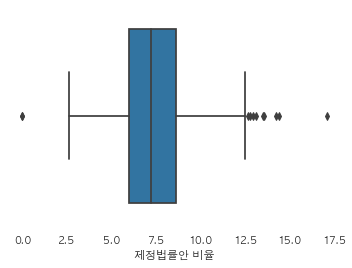

In [27]:
sns.boxplot(x=df_bills_portion['제정법률안 비율'])

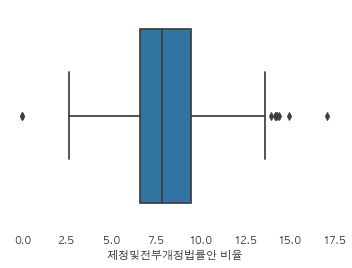

In [28]:
sns.boxplot(x=df_bills_portion['제정및전부개정법률안 비율'])

In [48]:
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.

# profile 만들기
profile = df_bills_portion.profile_report()
profile

# 저장하기
profile.to_file("/Users/junghyunwoo/Downloads/profile.html")

# 상위 % 잘라낸 뒤 추천하기

In [29]:
df_bills_portion.reset_index(inplace=True)

In [30]:
senators = senators.merge(df_bills_portion, left_on="한글이름", right_on="index", how="left")
senators = senators.drop(columns=['index'])

In [32]:
senators.columns

Index(['이름', '정당', '선거구', '당선횟수', '소속위원회', '학력', '주요경력', '연락처', '이메일',
       '대표발의법안수', '위원회 출석률', '본회의 출석률', '재산', '한글이름', '한자이름', '일부개정법률안 비율',
       '전부개정법률안 비율', '제정법률안 비율', '폐기법률안 비율', '제정및전부개정법률안 비율'],
      dtype='object')

In [75]:
df_temp = senators[['이름', '한글이름','제정및전부개정법률안 비율']].sort_values(['제정및전부개정법률안 비율'])
df_temp

,이름,한글이름,제정및전부개정법률안 비율
284,허윤정 許允貞,허윤정,0.00
245,정은혜 鄭恩惠,정은혜,0.00
248,정점식 鄭点植,정점식,2.63
271,최도자 崔道子,최도자,3.89
224,임재훈 林哉勳,임재훈,4.32
14,권칠승 權七勝,권칠승,4.38
181,이규희 李揆熙,이규희,4.41
220,이후삼 李厚三,이후삼,4.42
15,금태섭 琴泰燮,금태섭,4.44
136,신용현 申容賢,신용현,4.49


In [76]:
df_temp['순위'] = range(1, df_temp.shape[0]+1)

In [80]:
df_temp['percentile'] = round(100-(df_temp['순위']/295) * 100, 5)

In [81]:
df_temp['percentile'] = df_temp['percentile'].astype(str)
df_temp['percentile'] = df_temp['percentile'] + '%'
df_temp

,이름,한글이름,제정및전부개정법률안 비율,순위,percentile
284,허윤정 許允貞,허윤정,0.00,1,99.66102%
245,정은혜 鄭恩惠,정은혜,0.00,2,99.32203%
248,정점식 鄭点植,정점식,2.63,3,98.98305%
271,최도자 崔道子,최도자,3.89,4,98.64407%
224,임재훈 林哉勳,임재훈,4.32,5,98.30508%
14,권칠승 權七勝,권칠승,4.38,6,97.9661%
181,이규희 李揆熙,이규희,4.41,7,97.62712%
220,이후삼 李厚三,이후삼,4.42,8,97.28814%
15,금태섭 琴泰燮,금태섭,4.44,9,96.94915%
136,신용현 申容賢,신용현,4.49,10,96.61017%


In [85]:
df_temp[df_temp['한글이름']=="김정훈"]['percentile'].iloc[0]

'0.0%'

## 시연

In [86]:
search('복지')

['복지',
 '보건복지부장관',
 '복지시설',
 '보건복지부',
 '복지서비스',
 '장애인복지법',
 '사회복지사',
 '장애인복지시설',
 '복지향상',
 '사회복지사업법',
 '복지지원',
 '근로복지공단',
 '복지급여',
 '사회복지',
 '군인복지기금',
 '복지수요',
 '한국보훈복지의료공단법',
 '복지사각지대']

In [87]:
similarWord(embedding_model, '특수교육')

<ipython-input-15-778de1cfd69e>:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  return model.most_similar(positive=[text], topn=30)


[('교육기관', 0.5138239860534668),
 ('교육', 0.4978315830230713),
 ('사역', 0.48954474925994873),
 ('교육부장관', 0.4841839671134949),
 ('교육감', 0.4670001268386841),
 ('문화예술교육', 0.4641163945198059),
 ('고등교육기관', 0.4628736972808838),
 ('중등학교', 0.4615139365196228),
 ('입학금', 0.46107226610183716),
 ('수화', 0.46044689416885376),
 ('장애인복지시설', 0.46001365780830383),
 ('평생', 0.4596202075481415),
 ('교육법', 0.45390158891677856),
 ('학칙', 0.450979083776474),
 ('통역사', 0.4500640630722046),
 ('입학', 0.44048482179641724),
 ('교육기본법', 0.4399145841598511),
 ('접근권', 0.4374018907546997),
 ('학급', 0.4354908764362335),
 ('온종일', 0.43324023485183716),
 ('보육', 0.43132340908050537),
 ('검정고시', 0.43051469326019287),
 ('교재', 0.42899471521377563),
 ('합격자', 0.42609652876853943),
 ('신입', 0.42346853017807007),
 ('연수', 0.4221985340118408),
 ('도서관', 0.41680678725242615),
 ('신상', 0.41569992899894714),
 ('학습', 0.4155934453010559),
 ('초등', 0.4140894114971161)]

## Example 1

In [88]:
user_input=['복지서비스','장애인', '특수교육','장애인복지시설']

In [89]:
list_senator = similar_senators(user_input, senators_json, word_dict)
list_senator

{'여영국 정의당': '56.29%',
 '오영훈 더불어민주당': '55.07%',
 '정춘숙 더불어민주당': '54.86%',
 '유승민 미래통합당': '54.53%',
 '나경원 미래통합당': '54.43%'}

In [90]:
list_senator = similar_senators_with_q(user_input, senators_json, senators, word_dict, 0.25)
list_senator

{'여영국 정의당': '56.29%',
 '오영훈 더불어민주당': '55.07%',
 '정춘숙 더불어민주당': '54.86%',
 '유승민 미래통합당': '54.53%',
 '나경원 미래통합당': '54.43%'}

In [91]:
for senator in list_senator:
    senator = senator.split(' ')[0]
    print(senator, count_bills(senator, bills))

여영국 {'일부개정법률안 비율': '85.19%', '전부개정법률안 비율': '1.23%', '제정법률안 비율': '12.35%', '폐기법률안 비율': '1.23%'}
오영훈 {'일부개정법률안 비율': '89.58%', '전부개정법률안 비율': '0.94%', '제정법률안 비율': '7.61%', '폐기법률안 비율': '1.87%'}
정춘숙 {'일부개정법률안 비율': '91.56%', '전부개정법률안 비율': '0.98%', '제정법률안 비율': '5.88%', '폐기법률안 비율': '1.58%'}
유승민 {'일부개정법률안 비율': '87.3%', '전부개정법률안 비율': '0.27%', '제정법률안 비율': '10.54%', '폐기법률안 비율': '1.89%'}
나경원 {'일부개정법률안 비율': '86.88%', '전부개정법률안 비율': '0.0%', '제정법률안 비율': '11.56%', '폐기법률안 비율': '1.56%'}


In [97]:
for senator in list_senator:
    percentile = df_temp[df_temp['한글이름']==senator.split(' ')[0]]['percentile'].iloc[0]
    print(senator, ':', percentile)

여영국 정의당 : 3.72881%
오영훈 더불어민주당 : 35.59322%
정춘숙 더불어민주당 : 68.81356%
유승민 미래통합당 : 12.54237%
나경원 미래통합당 : 9.49153%


In [61]:
show_senators_bills_contents(list_senator, bills)

{'여영국 정의당': ['국회법 일부개정법률안(추혜선의원 등 14인)',
  '청년고용촉진 특별법 일부개정법률안(이정미의원 등 11인)',
  '영화 및 비디오물의 진흥에 관한 법률 일부개정법률안(추혜선의원 등 10인)'],
 '오영훈 더불어민주당': ['장애인 등에 대한 특수교육법 일부개정법률안(김해영의원 등 27인)',
  '국민체육진흥법 일부개정법률안(김광수의원 등 13인)',
  '교육정보화진흥법안(김민기의원 등 13인)'],
 '정춘숙 더불어민주당': ['다중이용업소의 안전관리에 관한 특별법 일부개정법률안(전혜숙의원 등 10인)',
  '야생생물 보호 및 관리에 관한 법률 일부개정법률안(양승조의원 등 10인)',
  '장애인·노인·임산부 등의 편의증진 보장에 관한 법률 일부개정법률안(임종성의원 등 12인)'],
 '유승민 미래통합당': ['교통약자의 이동편의 증진법 일부개정법률안(김현아의원 등 11인)',
  '장기공공임대주택 입주자 삶의 질 향상 지원법 일부개정법률안(이학재의원 등 10인)',
  '장애인차별금지 및 권리구제 등에 관한 법률 일부개정법률안(김세연의원 등 10인)'],
 '나경원 미래통합당': ['근로기준법 일부개정법률안(나경원의원 등 10인)',
  '도로교통법 일부개정법률안(조경태의원 등 11인)',
  '장애예술인 지원에 관한 법률안(나경원의원 등 10인)']}

## Example 2

In [98]:
user_input=['취업', '비정규직', '근로조건','청년실업률','취업지원']

In [99]:
list_senator = similar_senators(user_input, senators_json, word_dict)
list_senator

{'김현미 더불어민주당': '58.1%',
 '심상정 정의당': '57.11%',
 '이정미 정의당': '57.09%',
 '김부겸 더불어민주당': '57.08%',
 '김태년 더불어민주당': '56.71%'}

In [101]:
for senator in list_senator:
    senator = senator.split(' ')[0]
    print(senator, count_bills(senator, bills))

심상정 {'일부개정법률안 비율': '87.89%', '전부개정법률안 비율': '0.93%', '제정법률안 비율': '9.78%', '폐기법률안 비율': '1.4%'}
이정미 {'일부개정법률안 비율': '88.64%', '전부개정법률안 비율': '1.04%', '제정법률안 비율': '8.69%', '폐기법률안 비율': '1.62%'}
김부겸 {'일부개정법률안 비율': '84.64%', '전부개정법률안 비율': '0.71%', '제정법률안 비율': '11.43%', '폐기법률안 비율': '3.21%'}
김태년 {'일부개정법률안 비율': '89.18%', '전부개정법률안 비율': '1.08%', '제정법률안 비율': '7.36%', '폐기법률안 비율': '2.38%'}
김종대 {'일부개정법률안 비율': '88.87%', '전부개정법률안 비율': '0.52%', '제정법률안 비율': '8.51%', '폐기법률안 비율': '2.09%'}


In [102]:
for senator in list_senator:
    percentile = df_temp[df_temp['한글이름']==senator.split(' ')[0]]['percentile'].iloc[0]
    print(senator, ':', percentile)

심상정 정의당 : 14.23729%
이정미 정의당 : 21.69492%
김부겸 더불어민주당 : 7.11864%
김태년 더불어민주당 : 37.28814%
김종대 정의당 : 29.83051%


In [103]:
count_bills_all(bills)

{'일부개정법률안 비율': '93.12%',
 '전부개정법률안 비율': '0.41%',
 '제정법률안 비율': '4.92%',
 '폐기법률안 비율': '1.55%'}

In [104]:
show_senators_bills_contents(list_senator, bills)

{'심상정 정의당': ['국가유공자 등 예우 및 지원에 관한 법률 일부개정법률안(소병훈의원 등 23인)',
  '근로기준법 일부개정법률안(이정미의원 등 10인)',
  '청년고용촉진 특별법 일부개정법률안(정세균의원 등 108인)'],
 '이정미 정의당': ['남녀고용평등과 일·가정 양립 지원에 관한 법률 일부개정법률안(이용득의원 등 28인)',
  '지방자치단체를 당사자로 하는 계약에 관한 법률 일부개정법률안(이정미의원 등 10인)',
  '청년고용촉진 특별법 일부개정법률안(정세균의원 등 108인)'],
 '김부겸 더불어민주당': ['독립유공자예우에 관한 법률 일부개정법률안(맹성규의원 등 11인)',
  '근로기준법 일부개정법률안(이용득의원 등 22인)',
  '노동조합 및 노동관계조정법 일부개정법률안(송옥주의원 등 20인)'],
 '김태년 더불어민주당': ['근로기준법 일부개정법률안(신창현의원 등 13인)',
  '외무공무원법 일부개정법률안(박광온의원 등 10인)',
  '지방교육재정교부금법 일부개정법률안(김태년의원 등 15인)'],
 '김종대 정의당': ['노동조합 및 노동관계조정법 일부개정법률안(이정미의원 등 10인)',
  '지방자치단체를 당사자로 하는 계약에 관한 법률 일부개정법률안(이정미의원 등 10인)',
  '근로기준법 일부개정법률안(이정미의원 등 10인)']}